In [18]:
#install geopython libraries
!apt install gdal-bin python-gdal python3-gdal
#install python3-rtree - Geopandas requirement
!apt install python3-rtree 
#install geopandas
!pip install geopandas
#install descartes - Geopandas requirement
!pip install descartes

     ---------------------------------------- 1.1/1.1 MB 2.8 MB/s eta 0:00:00
     --------------------------------------- 22.0/22.0 MB 12.1 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 12.5 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 17.2 MB/s eta 0:00:00


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

In [20]:
#Read the world data and show the header
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [21]:
#Read the capitals data and show the header
capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
capitals.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


<AxesSubplot:>

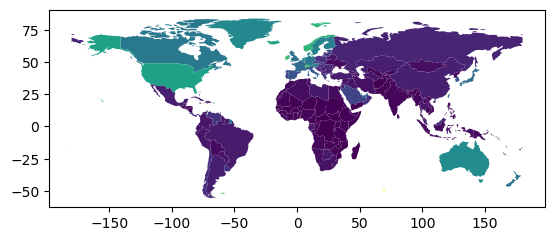

In [27]:
#plot a Map of GDP per capita without using pyplot
#define the map by excluding negative or zero population countries and Antarctica
world = world[(world.pop_est>0) & (world.name!="Antarctica")] 
#calculate GDP per capita by dividing GDP by population size
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap')

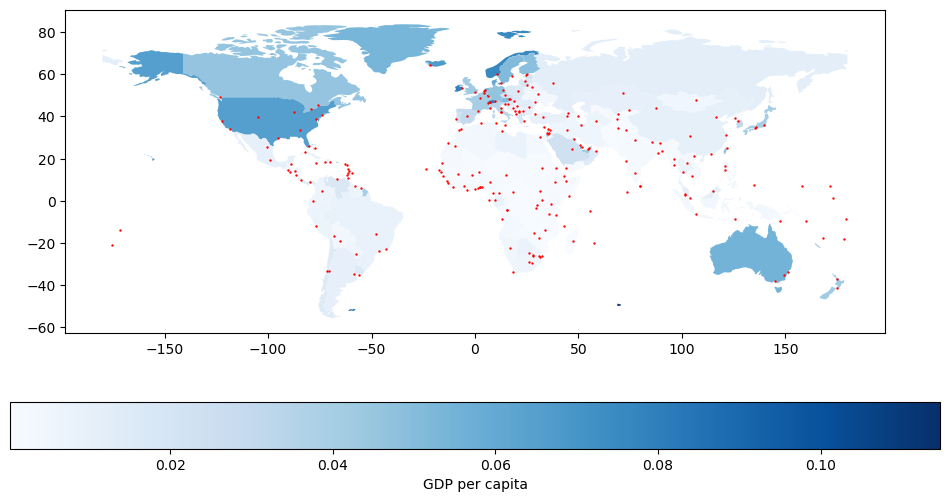

In [28]:
#Use pyplot (plt) to plot a world map with capital markers 
#shaded by gdp per capita with a scale bar
ig, ax = plt.subplots(figsize=(12,6))
world.plot(column='gdp_per_cap', cmap='Blues', ax=ax, legend=True, legend_kwds={'label': "GDP per capita", 'orientation': "horizontal"})
capitals.plot(markersize=0.5, color='red', ax=ax)
plt.show()

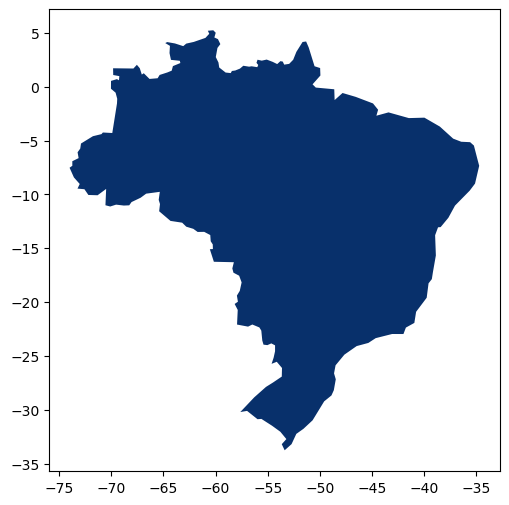

In [34]:
#Use pyplot (plt) to plot a country map such as Brazil 
fig, ax_nz = plt.subplots(figsize=(8,6))
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Brazil"].plot(cmap='Blues_r', ax=ax_nz)
plt.show()